<a href="https://colab.research.google.com/github/farhanzibran/Credit-Risk_Model/blob/main/Credit_Risk_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [264]:
import numpy as np
import pandas as pd

import os

import warnings
warnings.filterwarnings("ignore")

In [265]:
# Membaca csv file dan melihat 5 baris pertama
loan_data = pd.read_csv('/content/lc_2016_2017.csv')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [266]:
# Melihat total baris dan kolom
loan_data.shape

(759338, 72)

In [267]:
# Melihat info seluruh kolom
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

# **Target Variable**

Dikarenakan project ini untuk mengetahui bad loan & good loan, maka perlu dibuat feature baru, yaitu target variable yang merepresentasikan bad loan (sebagai 1) dan good loan (sebagai 0).

In [268]:
# Melihat unique values pada feature loan_status
loan_data.loan_status.unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

In [269]:
# Membuat feature baru yaitu good_bad sebagai target variable,
# Jika loan_statusnya 'Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)'
# akan dianggap sebagai bad_loan atau 1 dan nilai selain itu akan dianggap good loan atau 0
loan_data['good_bad'] = np.where(loan_data.loc[:, 'loan_status'].isin(['Charged Off',
                                                                   'Default', 'Late (31-120 days)', 'Late (16-30 days)'])
                                , 1 , 0)

In [270]:
# Melihat distribusi 0 dan 1
loan_data.good_bad.value_counts()

,count
good_bad,
0,702875
1,56463


In [271]:
loan_data.good_bad.value_counts(normalize=True)


,proportion
good_bad,
0,0.925642
1,0.074358


# **Missing Values**

Feature yang memiliki missing values lebih dari 50% akan di drop, karena jika ingin diisi dengan nilai lain seperti median atau mean, maka errornya akan sangat tinggi. Lebih baik di drop agar tidak membuat model semakin tidak akurat.

In [272]:
# Melihat feature apa saja yang memiliki missing value lebih dari 50%
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending=False)

,0
member_id,1.000000
desc,0.999978
dti_joint,0.955223
annual_inc_joint,0.955220
verification_status_joint,0.955220
mths_since_last_record,0.814076
mths_since_last_major_derog,0.716720


In [273]:
# Drop feature tersebut
loan_data.dropna(thresh = loan_data.shape[0]*0.5, axis=1, inplace=True)

In [274]:
# Pengecheckan ulang apakah feature tersebut berhasil di drop
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending=False)

,0


# **Data Splitting**

In [275]:
from sklearn.model_selection import train_test_split


In [276]:
# Membagi data menjadi 80/20 dengan menyamakan distribusi dari bad loans di test set dengan train set.
X = loan_data.drop('good_bad', axis=1)
y = loan_data['good_bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state=42)

In [277]:
y_train.value_counts(normalize=True)


,proportion
good_bad,
0,0.925642
1,0.074358


In [278]:
# Distribusi y_test sudah sama persis dengan y_train
y_test.value_counts(normalize=True)

,proportion
good_bad,
0,0.925639
1,0.074361


# **Data Cleaning**

In [279]:
# Terdapat 65 kolom, bagaimana untuk mengetahui kolom apa saja yang memiliki data kotor?
X_train.shape

(607470, 65)

In [280]:
# Dapat dilakukan print untuk semua unique values kolom, sehingga dapat di cek satu-satu
# unique values apa saja yang kotor.

for col in X_train.select_dtypes(include= ['object','bool']).columns:
     print(col)
     print(X_train[col].unique())
     print()

term
['36 months' '60 months']

grade
['C' 'A' 'B' 'E' 'D' 'G' 'F']

sub_grade
['C1' 'A1' 'B1' 'B5' 'A4' 'E2' 'A5' 'D1' 'C4' 'C3' 'G3' 'D3' 'E1' 'C5'
 'D2' 'C2' 'A2' 'E3' 'D5' 'E4' 'B2' 'F2' 'B4' 'A3' 'D4' 'B3' 'F1' 'F5'
 'G2' 'E5' 'F3' 'G1' 'G5' 'F4' 'G4']

emp_title
['Administrative assistant' 'director of workforce development' 'Nanny'
 ... 'Operations Planning Manager' 'Sr. xPression Developer'
 'making plant planner']

emp_length
['4 years' '10+ years' '< 1 year' '5 years' '6 years' '7 years' '2 years'
 '3 years' '8 years' '1 year' nan '9 years']

home_ownership
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE']

verification_status
['Source Verified' 'Not Verified' 'Verified']

issue_d
['Feb-2017' 'Apr-2016' 'Jul-2017' 'Oct-2016' 'Mar-2017' 'May-2016'
 'Mar-2016' 'Aug-2017' 'Jul-2016' 'Jan-2017' 'Sep-2016' 'Aug-2016'
 'Nov-2016' 'Dec-2016' 'Jun-2016' 'Sep-2017' 'Feb-2016' 'May-2017'
 'Jun-2017' 'Apr-2017' 'Jan-2016']

loan_status
['Current' 'Fully Paid' 'Late (16-30 days)' 'Charged Off'
 'La

In [281]:
# Kolom/feature yang harus di cleaning
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d',
                    'next_pymnt_d', 'last_credit_pull_d']

**X_Train**

In [282]:
# Menghilangkan ' months' menjadi ''
X_train['term'].str.replace(' months', '')

,term
147577,36
505776,36
412425,36
618730,36
111143,36
...,...
150426,36
195135,36
182511,36
82596,36


In [283]:
# Convert data type menjadi numeric
X_train['term'] = pd.to_numeric(X_train['term'].str.replace(' months', ''))

In [284]:
X_train['term']


,term
147577,36
505776,36
412425,36
618730,36
111143,36
...,...
150426,36
195135,36
182511,36
82596,36


In [285]:
# Cek values apa saja yang harus di cleaning
X_train['emp_length'].unique()

array(['4 years', '10+ years', '< 1 year', '5 years', '6 years',
       '7 years', '2 years', '3 years', '8 years', '1 year', nan,
       '9 years'], dtype=object)

In [286]:
# Hapus simbol '+' dari 'emp_length' jika ada
X_train['emp_length'] = X_train['emp_length'].str.replace(r'\+', '', regex=True)

# Hapus kata 'years' dan ganti '< 1 year' dengan '0'
X_train['emp_length'] = X_train['emp_length'].str.replace(' years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('< 1 year', '0')
X_train['emp_length'] = X_train['emp_length'].str.replace(' year', '')

# Isi NaN dengan 0
X_train['emp_length'].fillna(value=0, inplace=True)

# Konversi ke tipe numerik
X_train['emp_length'] = pd.to_numeric(X_train['emp_length'], errors='coerce')

# Pastikan tidak ada NaN setelah konversi
X_train['emp_length'].fillna(0, inplace=True)

# Cek tipe data dan hasil
print(X_train['emp_length'].dtype)


int64


In [287]:
X_train['emp_length']


,emp_length
147577,4
505776,10
412425,0
618730,5
111143,6
...,...
150426,8
195135,0
182511,10
82596,3


In [288]:
# Cek feature date
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d',
                    'next_pymnt_d', 'last_credit_pull_d']

X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,Feb-2017,Aug-1994,Dec-2017,Jan-2018,Dec-2017
505776,Apr-2016,Sep-2001,Jul-2017,NaN,Nov-2017
412425,Jul-2017,May-1999,Dec-2017,Jan-2018,Dec-2017
618730,Oct-2016,Jun-2005,Dec-2017,Jan-2018,Dec-2017
111143,Mar-2017,Jan-2012,Dec-2017,Jan-2018,Dec-2017
...,...,...,...,...,...
150426,Feb-2017,Nov-1998,Nov-2017,NaN,Dec-2017
195135,Jan-2017,Sep-1993,Dec-2017,Jan-2018,Dec-2017
182511,Jan-2017,Mar-1988,Dec-2017,Jan-2018,Dec-2017
82596,Apr-2017,Jan-2003,Dec-2017,Jan-2018,Dec-2017


In [289]:
for col in col_date:
    X_train[col] = pd.to_datetime(X_train[col])

In [290]:
# Check apakah berhasil di cleaning
X_train[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Index: 607470 entries, 147577 to 165904
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   term                607470 non-null  int64         
 1   emp_length          607470 non-null  int64         
 2   issue_d             607470 non-null  datetime64[ns]
 3   earliest_cr_line    607470 non-null  datetime64[ns]
 4   last_pymnt_d        606735 non-null  datetime64[ns]
 5   next_pymnt_d        473147 non-null  datetime64[ns]
 6   last_credit_pull_d  607453 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 37.1 MB


**X_Test**

In [291]:
# Menghilangkan ' months' menjadi ''
X_test['term'].str.replace(' months', '')

,term
280647,60
419992,36
44633,36
245940,36
565744,36
...,...
70748,36
43047,60
99030,36
625689,36


In [292]:
# Convert data type menjadi numeric
X_test['term'] = pd.to_numeric(X_test['term'].str.replace(' months', ''))

In [293]:
X_test['term']

,term
280647,60
419992,36
44633,36
245940,36
565744,36
...,...
70748,36
43047,60
99030,36
625689,36


In [294]:
# Cek values apa saja yang harus di cleaning
X_test['emp_length'].unique()


array(['10+ years', '7 years', '< 1 year', '2 years', nan, '5 years',
       '3 years', '8 years', '4 years', '1 year', '9 years', '6 years'],
      dtype=object)

In [295]:
# Hapus simbol '+' dari 'emp_length' jika ada
X_test['emp_length'] = X_test['emp_length'].str.replace(r'\+', '', regex=True)

# Hapus kata 'years' dan ganti '< 1 year' dengan '0'
X_test['emp_length'] = X_test['emp_length'].str.replace(' years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('< 1 year', '0')
X_test['emp_length'] = X_test['emp_length'].str.replace(' year', '')

# Isi NaN dengan 0
X_test['emp_length'].fillna(value=0, inplace=True)

# Konversi ke tipe numerik
X_test['emp_length'] = pd.to_numeric(X_test['emp_length'], errors='coerce')

# Pastikan tidak ada NaN setelah konversi
X_test['emp_length'].fillna(0, inplace=True)

# Cek tipe data dan hasil
print(X_test['emp_length'].dtype)


int64


In [296]:
X_test['emp_length']

,emp_length
280647,10
419992,7
44633,0
245940,2
565744,0
...,...
70748,4
43047,4
99030,0
625689,1


In [297]:
# Cek feature date
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d',
                    'next_pymnt_d', 'last_credit_pull_d']

X_test[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
280647,Jul-2016,Nov-1999,May-2017,NaN,Dec-2017
419992,Jul-2017,Jan-2006,Dec-2017,Jan-2018,Dec-2017
44633,May-2017,Dec-1976,Nov-2017,Jan-2018,May-2017
245940,Aug-2016,Dec-2005,Nov-2017,Jan-2018,Dec-2017
565744,Nov-2016,Oct-1970,Dec-2017,Jan-2018,Dec-2017
...,...,...,...,...,...
70748,May-2017,Mar-2012,Dec-2017,Jan-2018,Dec-2017
43047,May-2017,Jul-2002,Dec-2017,Jan-2018,Dec-2017
99030,Apr-2017,Aug-2003,Dec-2017,Jan-2018,Mar-2017
625689,Mar-2016,Aug-2012,Dec-2017,Jan-2018,Dec-2017


In [298]:
for col in col_date:
    X_test[col] = pd.to_datetime(X_test[col])

In [299]:
# Check apakah berhasil di cleaning
X_train[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Index: 607470 entries, 147577 to 165904
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   term                607470 non-null  int64         
 1   emp_length          607470 non-null  int64         
 2   issue_d             607470 non-null  datetime64[ns]
 3   earliest_cr_line    607470 non-null  datetime64[ns]
 4   last_pymnt_d        606735 non-null  datetime64[ns]
 5   next_pymnt_d        473147 non-null  datetime64[ns]
 6   last_credit_pull_d  607453 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 37.1 MB


# **Feature Engineering**

In [300]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((607470, 65), (607470,), (151868, 65), (151868,))

In [301]:
col_need_to_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [302]:
X_train[col_need_to_clean]

,term,emp_length,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,36,4,2017-02-01,1994-08-01,2017-12-01,2018-01-01,2017-12-01
505776,36,10,2016-04-01,2001-09-01,2017-07-01,NaT,2017-11-01
412425,36,0,2017-07-01,1999-05-01,2017-12-01,2018-01-01,2017-12-01
618730,36,5,2016-10-01,2005-06-01,2017-12-01,2018-01-01,2017-12-01
111143,36,6,2017-03-01,2012-01-01,2017-12-01,2018-01-01,2017-12-01
...,...,...,...,...,...,...,...
150426,36,8,2017-02-01,1998-11-01,2017-11-01,NaT,2017-12-01
195135,36,0,2017-01-01,1993-09-01,2017-12-01,2018-01-01,2017-12-01
182511,36,10,2017-01-01,1988-03-01,2017-12-01,2018-01-01,2017-12-01
82596,36,3,2017-04-01,2003-01-01,2017-12-01,2018-01-01,2017-12-01


In [303]:
X_train = X_train[col_need_to_clean]
X_test = X_test[col_need_to_clean]

In [304]:
del X_train['next_pymnt_d']
del X_test['next_pymnt_d']

In [305]:
X_train.shape, X_test.shape

((607470, 6), (151868, 6))

In [306]:
from datetime import date

date.today(). strftime('%Y-%m-%d')

'2025-01-22'

In [313]:
from datetime import date
import pandas as pd
import numpy as np

def date_columns(df, column):
    today_date = pd.to_datetime(date.today().strftime('%Y-%m-%d'))
    # Konversi kolom ke datetime
    df[column] = pd.to_datetime(df[column], format="%b-%y", errors='coerce')
    # Hitung jumlah bulan berdasarkan selisih hari dibagi 30
    df['mths_since_' + column] = ((today_date - df[column]).dt.days // 30).astype('Int64')
    # Hapus kolom asli
    df.drop(columns=[column], inplace=True)

# Terapkan fungsi ke DataFrame X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')


In [315]:
# Terapkan fungsi ke DataFrame X_test
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')

In [314]:
X_train

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
147577,36,4,371,97,86,86
505776,36,10,284,107,92,87
412425,36,0,313,92,86,86
618730,36,5,239,101,86,86
111143,36,6,159,96,86,86
...,...,...,...,...,...,...
150426,36,8,319,97,87,86
195135,36,0,382,98,86,86
182511,36,10,449,98,86,86
82596,36,3,268,95,86,86


In [316]:
X_test

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
280647,60,10,307,104,94,86
419992,36,7,232,92,86,86
44633,36,0,586,94,87,94
245940,36,2,233,103,87,86
565744,36,0,661,100,86,86
...,...,...,...,...,...,...
70748,36,4,157,94,86,86
43047,60,4,274,94,86,86
99030,36,0,261,95,86,96
625689,36,1,151,108,86,86


In [308]:
pd.to_datetime(date.today(). strftime('%Y-%m-%d')) - pd.to_datetime ('2017-02-01')

Timedelta('2912 days 00:00:00')

In [309]:
2912/60

48.53333333333333

In [310]:
X_train

,term,emp_length,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
147577,36,4,2017-02-01,1994-08-01,2017-12-01,2017-12-01
505776,36,10,2016-04-01,2001-09-01,2017-07-01,2017-11-01
412425,36,0,2017-07-01,1999-05-01,2017-12-01,2017-12-01
618730,36,5,2016-10-01,2005-06-01,2017-12-01,2017-12-01
111143,36,6,2017-03-01,2012-01-01,2017-12-01,2017-12-01
...,...,...,...,...,...,...
150426,36,8,2017-02-01,1998-11-01,2017-11-01,2017-12-01
195135,36,0,2017-01-01,1993-09-01,2017-12-01,2017-12-01
182511,36,10,2017-01-01,1988-03-01,2017-12-01,2017-12-01
82596,36,3,2017-04-01,2003-01-01,2017-12-01,2017-12-01


In [317]:
X_test.isnull().sum()

,0
term,0
emp_length,0
mths_since_earliest_cr_line,0
mths_since_issue_d,0
mths_since_last_pymnt_d,213
mths_since_last_credit_pull_d,1


In [318]:
X_train.isnull().sum()

,0
term,0
emp_length,0
mths_since_earliest_cr_line,0
mths_since_issue_d,0
mths_since_last_pymnt_d,735
mths_since_last_credit_pull_d,17


In [319]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

In [321]:
X_train.isnull().sum()

,0
term,0
emp_length,0
mths_since_earliest_cr_line,0
mths_since_issue_d,0
mths_since_last_pymnt_d,0
mths_since_last_credit_pull_d,0


In [322]:
X_test.isnull().sum()

,0
term,0
emp_length,0
mths_since_earliest_cr_line,0
mths_since_issue_d,0
mths_since_last_pymnt_d,0
mths_since_last_credit_pull_d,0


# **Modelling**

In [323]:
from sklearn.linear_model import LogisticRegression

In [326]:
model = LogisticRegression()

In [327]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [330]:
result = pd.DataFrame(list(zip(y_pred, y_test)), columns=['y_pred', 'y_test'])
result.head()

,y_pred,y_test
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0


In [332]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9167961650907367

In [334]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

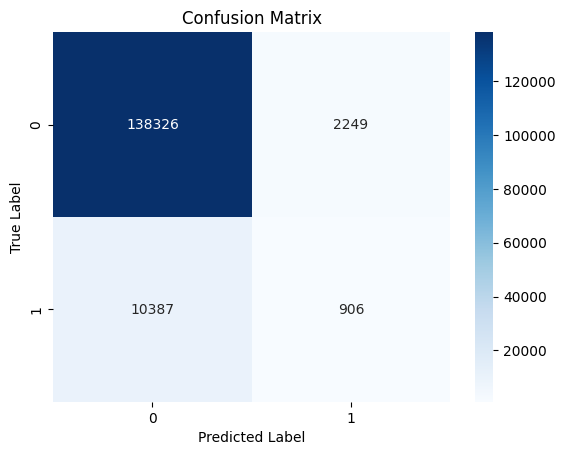

In [340]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [339]:
y_train.value_counts(normalize=True)

,proportion
good_bad,
0,0.925642
1,0.074358


bisa dikatakan, dugaan masih banyak hasil pengujian yang salah adalah dikarenakan data y-train tidak balance, maka oleh karena itu menyebabkan hasil kurang akurat

# **Modelling 2**

In [341]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [345]:
# memprediksi probability dan mengambil probability kelas positive
y_pred = model.predict_proba(X_test) [:, 1]

In [347]:
y_pred

array([0.25077331, 0.02405715, 0.00906642, ..., 0.0077237 , 0.05849419,
       0.03373028])

In [346]:
(y_pred > 0.5).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

(array([130199.,   9457.,   4636.,   2547.,   1601.,   1088.,    925.,
           696.,    501.,    218.]),
 array([0.0012124 , 0.09705527, 0.19289814, 0.288741  , 0.38458387,
        0.48042674, 0.57626961, 0.67211248, 0.76795534, 0.86379821,
        0.95964108]),
 <BarContainer object of 10 artists>)

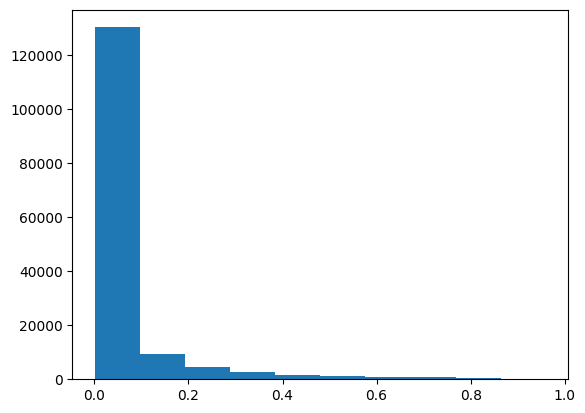

In [348]:
plt.hist(y_pred)

In [351]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [353]:
# youden j-statistic
j = tpr - fpr

ix = np.argmax(j)

best_thresh = thresholds[ix]
best_thresh

0.06289618728991508

In [355]:
y_pred = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred > 0.062).astype(int)

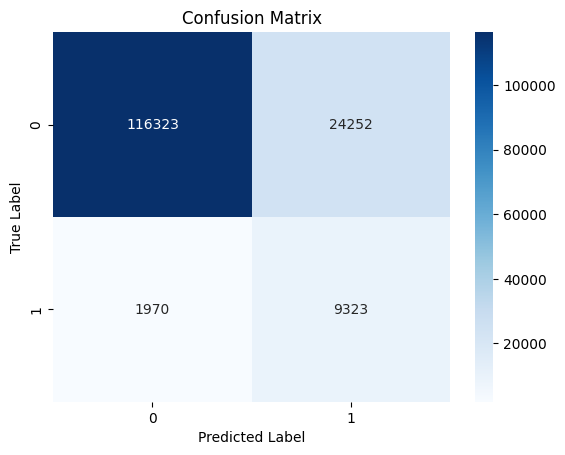

In [356]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [357]:
model.coef_

array([[ 0.01781542, -0.03245583, -0.00100217,  0.04053175,  0.23338228,
        -0.14724599]])

In [362]:
model.intercept_

array([-15.02127474])

In [359]:
df_coeff = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coeff

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,0.017815,-0.032456,-0.001002,0.040532,0.233382,-0.147246


In [358]:
X_train.head()

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
147577,36,4,371,97,86,86
505776,36,10,284,107,92,87
412425,36,0,313,92,86,86
618730,36,5,239,101,86,86
111143,36,6,159,96,86,86
